# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [4]:
library('tidyverse')

options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [34]:
ve = read.csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv')

ve %>% print

     volcano_number                          volcano_name eruption_number
1            266030                               Soputan           22354
2            343100                            San Miguel           22355
3            233020                Fournaise, Piton de la           22343
4            345020                    Rincon de la Vieja           22346
5            353010                            Fernandina           22347
6            273070                                  Taal           22344
7            282050                      Kuchinoerabujima           22345
8            241040                 Whakaari/White Island           22338
9            311060                         Semisopochnoi           22341
10           284096                          Nishinoshima           22340
11           311240                             Cleveland           22342
12           282060                                 Kikai           22339
13           300260                   

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [27]:
ve_count = ve %>%
    count(volcano_name)

ve_count %>% 
    arrange(desc(n)) %>%
    head

,volcano_name,n
,<chr>,<int>
1,Etna,241
2,"Fournaise, Piton de la",194
3,Asosan,186
4,Villarrica,164
5,Asamayama,147
6,Katla,132


### Etna is the volcano with the most recorded eruptions 

Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [30]:
ve %>% 
    filter(volcano_name == "Etna") %>%
    arrange(desc(end_year)) %>%
    head

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,211060,Etna,20841,Confirmed Eruption,New Southeast Crater (NSEC),2,2013,9,3,Historical Observations,2020,4,17,37.748,14.999
2,211060,Etna,13854,Confirmed Eruption,"Bocca Nuova, NE and SE Craters",1,2010,8,25,Historical Observations,2013,4,27,37.748,14.999
3,211060,Etna,13853,Confirmed Eruption,SE Crater,2,2010,4,8,Historical Observations,2010,4,8,37.748,14.999
4,211060,Etna,13852,Confirmed Eruption,East base of NE Crater (3000-2650 m),1,2008,5,13,Historical Observations,2009,7,4,37.748,14.999
5,211060,Etna,13849,Confirmed Eruption,"Bocca Nuova, SE Crater and flank vents",2,2007,3,19,Historical Observations,2008,5,16,37.748,14.999
6,211060,Etna,13848,Confirmed Eruption,SE Crater & flank vents; NE Crater,2,2006,7,14,Historical Observations,2006,12,15,37.748,14.999


### Etna's most recent eruption began at 2013 and ended at 2020. 

Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

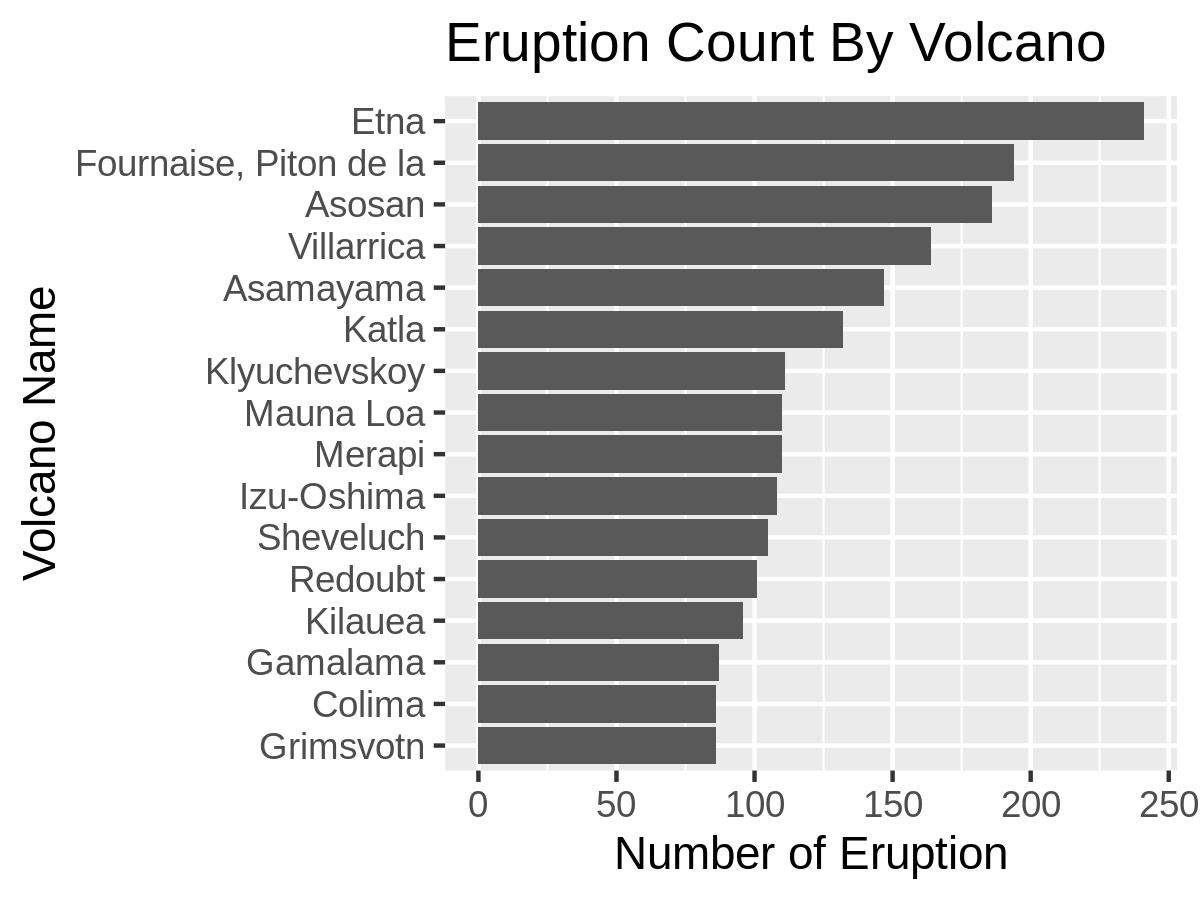

In [47]:
ve_lumped = ve %>%
    mutate(volcano_lumped = volcano_name %>% fct_lump(n = 15) %>% fct_infreq() %>% fct_rev())  %>%
    filter(volcano_lumped != "Other")

p = ggplot(ve_lumped, aes(y = volcano_lumped))

p = p + geom_bar()

p = p + labs(x = "Number of Eruption", y = "Volcano Name")

p = p + labs(title = "Eruption Count By Volcano")

p


Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



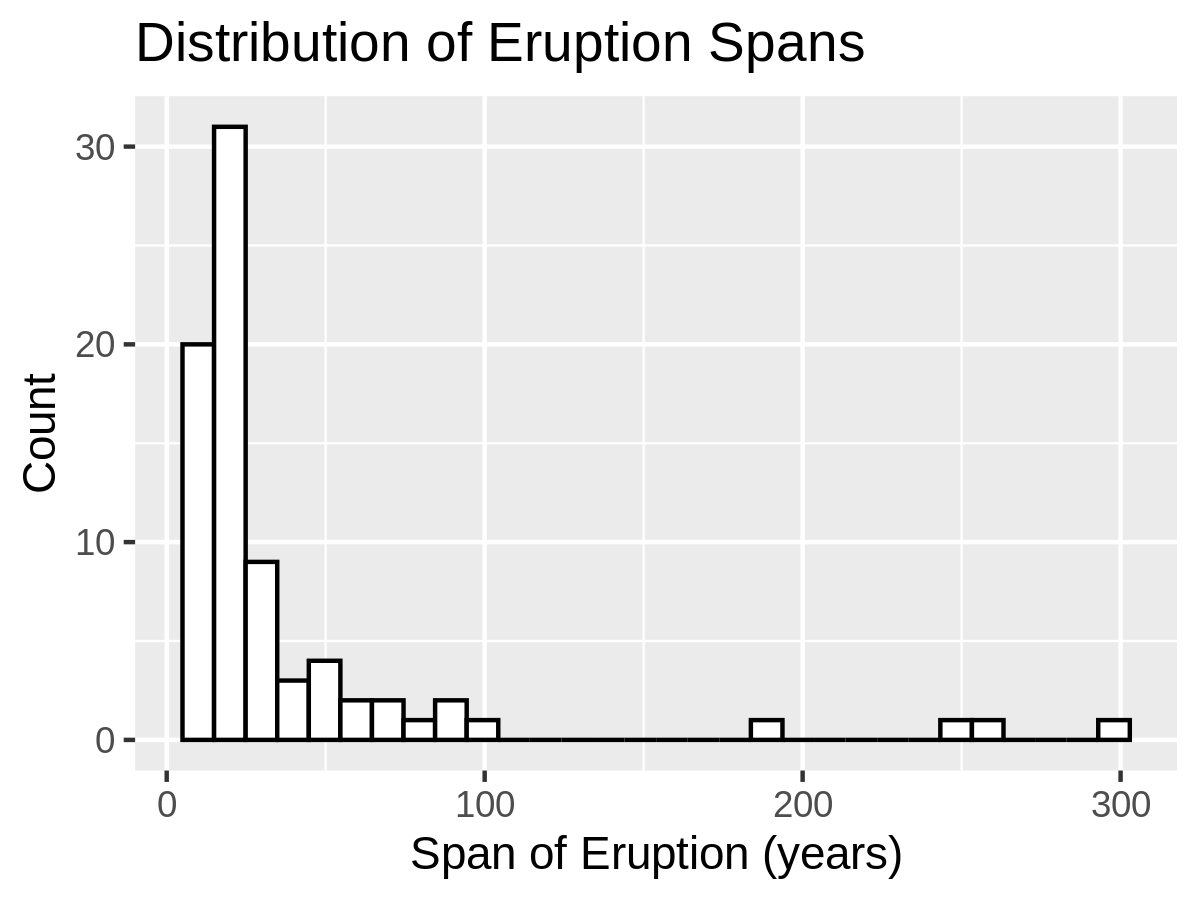

In [54]:
ve_span = ve %>% 
    mutate(span = end_year - start_year) %>% 
    filter(span > 10)

p = ggplot(ve_span, aes(x = span))

p = p + geom_histogram(color="black", fill="white")

p = p + labs(x = "Span of Eruption (years)", y = "Count")

p = p + labs(title = "Distribution of Eruption Spans")

p

In [59]:
ve_span = ve %>% 
    group_by(volcano_name) %>%
    mutate(span = end_year - start_year) %>% 
    filter(span > 10) %>% 
    arrange(desc(span)) 

ve_span %>% head

volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude,span
<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
211040,Stromboli,13425,Confirmed Eruption,Summit craters and Sciara del Fuoco,3,1558,0,0,Historical Observations,1857,0,0,38.789,15.213,299
384010,Fogo,13128,Confirmed Eruption,Pico,1,1500,0,0,Historical Observations,1761,0,0,14.950,-24.350,261
257100,Yasur,15355,Confirmed Eruption,NA,3,1774,7,2,Historical Observations,2020,4,17,-19.532,169.447,246
352090,Sangay,11647,Confirmed Eruption,NA,3,1728,9,30,Historical Observations,1916,0,0,-2.005,-78.341,188
342030,Santa Maria,10626,Confirmed Eruption,SW flank (Santiaguito),3,1922,6,22,Historical Observations,2020,4,17,14.757,-91.552,98
268010,Dukono,16577,Confirmed Eruption,Malupang Magiwe and Malupang Warirang,3,1933,8,13,Historical Observations,2020,4,17,1.693,127.894,87


### Stromboli had the longest span of eruption that lasted 299 years. The second longest eruption span is 261 years by Fogo. 